In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Tensorflow Version 2.6.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install scikit-learn>=0.24
!pip install ktrain # for BERT model

     |████████████████████████████████| 25.3 MB 100 kB/s 
     |████████████████████████████████| 6.8 MB 56.2 MB/s 
     |████████████████████████████████| 981 kB 41.2 MB/s 
     |████████████████████████████████| 263 kB 61.1 MB/s 
     |████████████████████████████████| 1.9 MB 46.5 MB/s 
     |████████████████████████████████| 1.2 MB 38.8 MB/s 
     |████████████████████████████████| 468 kB 52.0 MB/s 
     |████████████████████████████████| 3.3 MB 32.6 MB/s 
     |████████████████████████████████| 895 kB 34.0 MB/s 
  Created wheel for ktrain: filename=ktrain-0.27.3-py3-none-any.whl size=25283131 sha256=bdb25926a3baaeeb3824d42101addea8c69a19c6f0d9590ec89b2d04861f81b4
  Stored in directory: /root/.cache/pip/wheels/3c/ef/e1/7da805d8a5944e8a3ac0553831d832c00b1800b848939849cb
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=555fc3eaabf89c7a2235acc54a2db8df881e86fabad2db75a2a7d55c2d7967a2
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff

In [4]:
df = pd.read_csv('/content/drive/MyDrive/datagram/data/train_datam.csv')
df

,Unnamed: 0,category_id,pname
0,0,403,"Double concentré de tomates MUTTI, tube de 130g"
1,1,837,Pur jus de pommes pressées Pure Prémium TROPIC...
2,2,485,Rillettes de poulet rôti en cocotte
3,3,363,My Eyes - Taille-crayons 3 diamètres
4,4,591,Brosse à dents Inter Espaces médium AQUAFRESH
...,...,...,...
161875,162161,372,"Lait pour le corps bio à l'aloé véra SO BIO, 4..."
161876,162162,510,"Hacao aux crevettes + 2 sauces soja, 200g"
161877,162163,587,"Studio Line - Indestuctible 9, gel fixation ex..."
161878,162164,411,BISCUITS POIREAU 100G


In [5]:
del df['Unnamed: 0']
df.columns = ['category_id', 'pname']
df.head()

,category_id,pname
0,403,"Double concentré de tomates MUTTI, tube de 130g"
1,837,Pur jus de pommes pressées Pure Prémium TROPIC...
2,485,Rillettes de poulet rôti en cocotte
3,363,My Eyes - Taille-crayons 3 diamètres
4,591,Brosse à dents Inter Espaces médium AQUAFRESH


In [6]:
"""import random
random_idx_list = [random.randint(1,len(df.tweet)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it"""

'import random\nrandom_idx_list = [random.randint(1,len(df.tweet)) for i in range(10)] # creates random indexes to choose from dataframe\ndf.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it'

In [7]:
"""stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"""

'stop_words = stopwords.words(\'english\')\nstemmer = SnowballStemmer(\'english\')\n\ntext_cleaning_re = "@\\S+|https?:\\S+|http?:\\S|[^A-Za-z0-9]+'

In [8]:
"""def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)"""

'def preprocess(text, stem=False):\n  text = re.sub(text_cleaning_re, \' \', str(text).lower()).strip()\n  tokens = []\n  for token in text.split():\n    if token not in stop_words:\n      if stem:\n        tokens.append(stemmer.stem(token))\n      else:\n        tokens.append(token)\n  return " ".join(tokens)'

In [9]:
"""df.tweet = df.tweet.apply(lambda x: preprocess(x))"""

'df.tweet = df.tweet.apply(lambda x: preprocess(x))'

In [10]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [11]:
df['tweet'] = df['pname'] 
df['label'] = df['category_id']  

In [12]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set

test_data = test_data.groupby('category_id').filter(lambda x : (x['category_id'].count()>=10).any())
train_data = train_data.groupby('category_id').filter(lambda x : (x['category_id'].count()>=10).any())                               
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 129504
Test Data size 32205


In [13]:
train_data.head(10)

,category_id,pname,tweet,label
27381,377,Fines mousses au saumon-poulet-dinde-rognons p...,Fines mousses au saumon-poulet-dinde-rognons p...,377
158645,393,"Haricots beurre extra-fins d'Aucy, 2x4/4, 880g","Haricots beurre extra-fins d'Aucy, 2x4/4, 880g",393
44090,349,Savon détachant écologique à l'huile d'olive b...,Savon détachant écologique à l'huile d'olive b...,349
23089,467,*BLEU DES NEIGES 500G,*BLEU DES NEIGES 500G,467
161552,386,Olives vertes farcies au poivron goût piment,Olives vertes farcies au poivron goût piment,386
49802,610,Mouchoirs,Mouchoirs,610
11173,526,Tarte au chocolat Pierron 400g,Tarte au chocolat Pierron 400g,526
87452,363,"Trousse petit modèle, Ca612 DESSANGE","Trousse petit modèle, Ca612 DESSANGE",363
116463,600,Rasoir pour homme sensitive skinguard GILLETTE...,Rasoir pour homme sensitive skinguard GILLETTE...,600
102295,597,"Gel douche tonifiant NATURA SIBERICA, 400ml","Gel douche tonifiant NATURA SIBERICA, 400ml",597


In [14]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.tweet)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 28867


In [15]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweet),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweet),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (129504, 30)
Testing X Shape: (32205, 30)


In [16]:
labels = train_data.label.unique().tolist()

In [17]:
encoder = LabelEncoder()
encoder.fit(train_data.label.to_list())

y_train = encoder.transform(train_data.label.to_list())
y_test = encoder.transform(test_data.label.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (129504, 1)
y_test shape: (32205, 1)


In [18]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-09-26 07:34:59--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-09-26 07:35:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-09-26 07:35:00--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [19]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 150
MODEL_PATH = '/content/drive/MyDrive/Classroom/best_model.hdf5'

In [20]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [21]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [22]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [23]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [24]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(len(labels), activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [26]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on CPU...


In [27]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/150
127/127 [==============================] - 133s 1s/step - loss: 4.1237 - accuracy: 0.1770 - val_loss: 2.6002 - val_accuracy: 0.4118
Epoch 2/150
127/127 [==============================] - 127s 998ms/step - loss: 2.5290 - accuracy: 0.4258 - val_loss: 1.9432 - val_accuracy: 0.5450
Epoch 3/150
127/127 [==============================] - 127s 997ms/step - loss: 2.1045 - accuracy: 0.5055 - val_loss: 1.6894 - val_accuracy: 0.5974
Epoch 4/150
127/127 [==============================] - 127s 998ms/step - loss: 1.8954 - accuracy: 0.5497 - val_loss: 1.5405 - val_accuracy: 0.6287
Epoch 5/150
127/127 [==============================] - 127s 997ms/step - loss: 1.7634 - accuracy: 0.5744 - val_loss: 1.4397 - val_accuracy: 0.6487
Epoch 6/150
127/127 [==============================] - 127s 999ms/step - loss: 1.6698 - accuracy: 0.5952 - val_loss: 1.3782 - val_accuracy: 0.6652
Epoch 7/150
127/127 [==============================] - 127s 1s/step - loss: 1.5923 - accuracy: 0.6104 - val_loss: 1.3227 

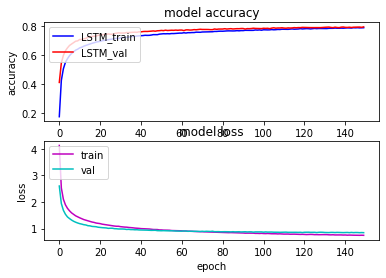

In [28]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [29]:
"""def decode_sentiment(score):
    return np.argmax(score) 


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]
y_pred_1d"""

'def decode_sentiment(score):\n    return np.argmax(score) \n\n\nscores = model.predict(x_test, verbose=1, batch_size=10000)\ny_pred_1d = [decode_sentiment(score) for score in scores]\ny_pred_1d'

In [ ]:
"""import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)"""

In [ ]:
"""cnf_matrix = confusion_matrix(test_data.label.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.label.unique(), title="Confusion matrix")
plt.show()"""

In [ ]:
"""print(classification_report(list(test_data.label), y_pred_1d))"""

In [ ]:
"""!pip install scikit-plot"""

In [ ]:
"""import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    list(test_data.label), 
    y_pred_1d,
    figsize=(12,12),x_tick_rotation=90)"""

In [31]:
"""y_pred_glove = (model.predict(x_test) > 0.5).astype("int")"""

In [ ]:
"""y_pred = [le.classes_[x] for x in y_pred_glove.argmax(axis=1)]"""

In [ ]:
"""from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Accuracy is {} for glove embedding.".format(accuracy_score(test_data.label, y_pred_glove.argmax(axis=1))))"""

In [ ]:
"""print(classification_report(y_test, y_pred_glove.argmax(axis=1), zero_division = 1))"""

In [ ]:
"""y_test_probs = model.predict(X_test)

# Turn probabilities into an interger prediction
y_hat = []
for prob in y_test_probs:
    y_hat.append(np.argmax(prob))"""


"""print("Accuracy:", accuracy_score(y_test, y_hat))
print_cf1(y_test, y_hat)"""

"""print(classification_report(y_test, y_hat, target_names=labels_5))"""
